In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
train = 'Data/Corona_NLP_train.csv'
test = 'Data/Corona_NLP_test.csv'

In [3]:
trainOriginal = pd.read_csv(train, encoding='latin-1')
testOriginal = pd.read_csv(test, encoding= 'latin-1')

In [4]:
train = trainOriginal.copy()
test = testOriginal.copy()

In [5]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
train['Location'].value_counts()[:60]

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
New Delhi, India           138
Atlanta, GA                126
New York                   126
Mumbai, India              109
Worldwide                  101
Lagos, Nigeria              99
Texas, USA                  98
Austin, TX                  98
Houston, TX                 98
London, UK                  96
Toronto                     91
Los Angeles                 89
Nairobi,

In [10]:
train['Location'] = train['Location'].str.split(",").str[0]
test['Location'] = test['Location'].str.split(",").str[0]

In [11]:
train['Location'].value_counts()[:60]

London            1247
New York           709
United States      530
Washington         504
Los Angeles        402
Toronto            346
United Kingdom     342
India              276
Chicago            262
England            255
UK                 246
USA                231
Australia          230
California         211
San Francisco      206
Sydney             202
New Delhi          201
Melbourne          199
Canada             198
Boston             197
Mumbai             197
Atlanta            165
Global             159
Houston            156
Texas              145
Lagos              136
Austin             130
Florida            121
Seattle            120
Nairobi            117
Dallas             115
Philadelphia       114
Manchester         111
Vancouver          106
Scotland           104
New Jersey         103
Worldwide          101
San Diego           99
New York City       95
Dubai               91
Singapore           88
South Africa        87
Denver              86
Portland   

In [12]:
train['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [13]:
train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [14]:
train['id']= 0
test['id']=1
covid = pd.concat([train,test])
covid.reset_index(drop = True , inplace= True)


In [15]:
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,id
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [16]:
covid['Sentiment']= covid['Sentiment'].str.replace('Extremely Positive','Positive')
covid['Sentiment']= covid['Sentiment'].str.replace('Extremely Negative','Negative')


In [17]:
covid[:50]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,id
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,0
5,3804,48756,ÃT: 36.319708,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,0
6,3805,48757,35.926541,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,0
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,0
8,3807,48759,Atlanta,16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,0
9,3808,48760,BHAVNAGAR,16-03-2020,"For corona prevention,we should stop to buy th...",Negative,0


In [18]:
covid = covid.drop('UserName',axis=1)
covid = covid.drop('ScreenName',axis=1)
covid = covid.drop('Location',axis=1)
covid = covid.drop('TweetAt',axis=1)
covid

,OriginalTweet,Sentiment,id
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,advice Talk to your neighbours family to excha...,Positive,0
2,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,My food stock is not the only one which is emp...,Positive,0
4,"Me, ready to go at supermarket during the #COV...",Negative,0
...,...,...,...
44950,Meanwhile In A Supermarket in Israel -- People...,Positive,1
44951,Did you panic buy a lot of non-perishable item...,Negative,1
44952,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,1
44953,Gov need to do somethings instead of biar je r...,Negative,1


In [19]:
covid['Sentiment'] = covid['Sentiment'].map({'Neutral':0,'Positive':1,'Negative':2})


In [20]:
hashtags = train['OriginalTweet'].str.extractall(r"(#\S+)")
hashtags = hashtags[0].value_counts()
hashtags[:30]

#coronavirus            12320
#COVID19                 3221
#Covid_19                2497
#Coronavirus             2081
#COVID2019               1603
#toiletpaper             1338
#covid19                 1100
#COVID?19                 792
#CoronaCrisis             719
#CoronaVirus              600
#SocialDistancing         598
#covid_19                 432
#CoronavirusPandemic      409
#CoronavirusOutbreak      391
#pandemic                 376
#StayHomeSaveLives        334
#Covid19                  331
#StayAtHome               319
#lockdown                 314
#supermarket              306
#StayHome                 305
#panicbuying              298
#coronavirus.             295
#retail                   289
#corona                   280
#CoronaVirusUpdate        280
#StopHoarding             274
#socialdistancing         265
#COVID-19                 224
#StopPanicBuying          218
Name: 0, dtype: int64

In [21]:
mentions = train['OriginalTweet'].str.extractall(r"(@\S+)")
mentions = mentions[0].value_counts()
mentions[:30]

@realDonaldTrump    239
@Tesco              180
@sainsburys         152
@BorisJohnson       141
@narendramodi       110
@asda               103
@amazon              95
@PMOIndia            94
@Morrisons           87
@piersmorgan         84
@YouTube             83
@waitrose            70
@CNN                 56
@AldiUK              52
@FTC                 48
@Walmart             47
@CDCgov              44
@NYGovCuomo          42
@BBCNews             41
@SkyNews             40
@LidlGB              38
@nytimes             37
@ssupnow             37
@MailOnline          36
@WSJ                 34
@Coles               33
@McKinsey            33
@10DowningStreet     31
@kroger              31
@WHO                 30
Name: 0, dtype: int64

In [22]:
import re


def clean(text):
    text = re.sub(r'http\S+', " ", text)
    text = re.sub(r'@\w+',' ',text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub('r<.*?>',' ', text)
    text = text.split()
    text = " ".join([word for word in text if not word in stopWord])
    
    return text

In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/arun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
stopWord = stopwords.words('english')

In [25]:
covid['OriginalTweet'] = covid['OriginalTweet'].apply(lambda x: clean(x))

In [26]:
covid.head()

,OriginalTweet,Sentiment,id
0,,0,0
1,advice Talk neighbours family exchange phone n...,1,0
2,Coronavirus Australia: Woolworths give elderly...,1,0
3,"My food stock one empty... PLEASE, panic, THER...",1,0
4,"Me, ready go supermarket outbreak. Not I'm par...",2,0


## Visualization

Text(0.5,1,'Twitted locations')

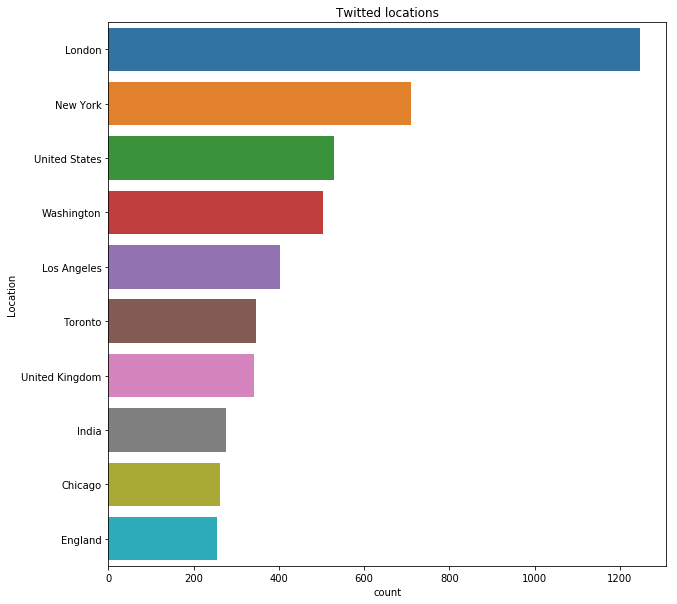

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(y='Location',data=train,order=train.Location.value_counts().iloc[
    0:10].index).set_title("Twitted locations")

In [28]:
plotDf=train.iloc[:,[2,5]]

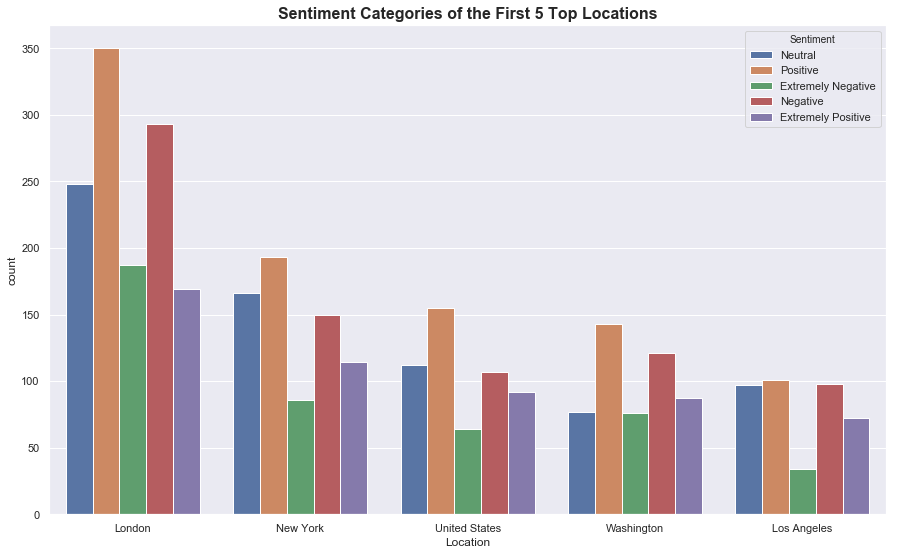

In [29]:
sns.set(rc={'figure.figsize':(15,9)})
gg = train.Location.value_counts()[:5].index
plt.title('Sentiment Categories of the First 5 Top Locations', fontsize=16, fontweight='bold')
sns.countplot(x = 'Location', hue = 'Sentiment', data = plotDf, order = gg)

In [30]:
covid.head()

,OriginalTweet,Sentiment,id
0,,0,0
1,advice Talk neighbours family exchange phone n...,1,0
2,Coronavirus Australia: Woolworths give elderly...,1,0
3,"My food stock one empty... PLEASE, panic, THER...",1,0
4,"Me, ready go supermarket outbreak. Not I'm par...",2,0


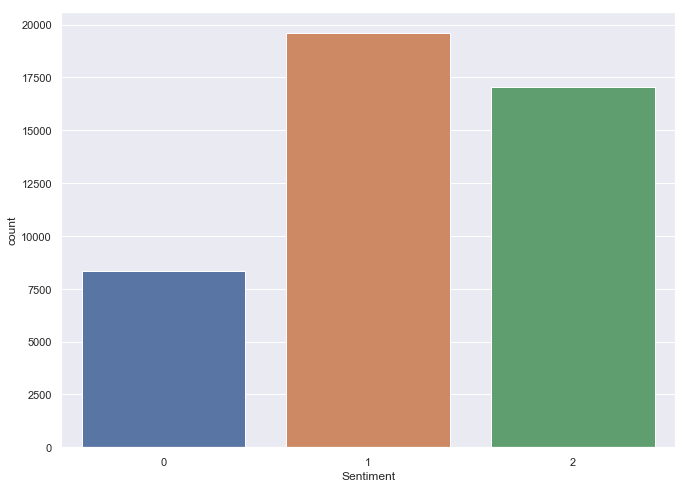

In [31]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(covid['Sentiment'])

In [44]:
covid.tail()

,OriginalTweet,Sentiment,id,Corpus
44950,Meanwhile In A Supermarket Israel -- People da...,1,1,Meanwhile In A Supermarket Israel -- People da...
44951,Did panic buy lot non-perishable items? ECHO n...,2,1,Did panic buy lot non-perishable item ? ECHO n...
44952,Asst Prof Economics talking recent research co...,0,1,Asst Prof Economics talking recent research co...
44953,Gov need somethings instead biar je rakyat ass...,2,1,Gov need somethings instead biar je rakyat ass...
44954,I members committed safety employees end-users...,1,1,I member committed safety employee end-users ....


## Data Modelling

In [40]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [41]:
covid['Corpus'] = [nltk.word_tokenize(text) for text in covid.OriginalTweet]
lemma = nltk.WordNetLemmatizer()
covid.Corpus = covid.apply(lambda x: [lemma.lemmatize(word) for word in x.Corpus], axis=1)
covid.Corpus = covid.apply(lambda x: " ".join(x.Corpus),axis=1)

In [42]:
covid.tail()

,OriginalTweet,Sentiment,id,Corpus
44950,Meanwhile In A Supermarket Israel -- People da...,1,1,Meanwhile In A Supermarket Israel -- People da...
44951,Did panic buy lot non-perishable items? ECHO n...,2,1,Did panic buy lot non-perishable item ? ECHO n...
44952,Asst Prof Economics talking recent research co...,0,1,Asst Prof Economics talking recent research co...
44953,Gov need somethings instead biar je rakyat ass...,2,1,Gov need somethings instead biar je rakyat ass...
44954,I members committed safety employees end-users...,1,1,I member committed safety employee end-users ....


In [47]:
train = covid[covid.id==0]
test = covid[covid.id==1]
train.drop('id',axis=1, inplace=True)
test.drop('id',axis=1, inplace=True)
test.reset_index(drop=True,inplace=True)

/home/arun/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
train.head()

,OriginalTweet,Sentiment,Corpus
0,,0,
1,advice Talk neighbours family exchange phone n...,1,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths give elderly...,1,Coronavirus Australia : Woolworths give elderl...
3,"My food stock one empty... PLEASE, panic, THER...",1,"My food stock one empty ... PLEASE , panic , T..."
4,"Me, ready go supermarket outbreak. Not I'm par...",2,"Me , ready go supermarket outbreak . Not I 'm ..."


In [50]:
test.head()

,OriginalTweet,Sentiment,Corpus
0,TRENDING: New Yorkers encounter empty supermar...,2,TRENDING : New Yorkers encounter empty superma...
1,"When I find hand sanitizer Fred Meyer, I turne...",1,"When I find hand sanitizer Fred Meyer , I turn..."
2,Find protect loved ones . ?,1,Find protect loved one . ?
3,buying hits City anxious shoppers stock food&a...,2,buying hit City anxious shopper stock food & a...
4,One week everyone buying baby milk powder next...,0,One week everyone buying baby milk powder next...


In [51]:
XTrain = train.Corpus
yTrain = train.Sentiment

XTest = test.Corpus
yTest = test.Sentiment

XTrain, XVal, yTrain, yVal = train_test_split(XTrain, yTrain, test_size=0.2,random_state=42)


In [52]:
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,2),min_df=5).fit(covid.Corpus)

XTrainVec = vectorizer.transform(XTrain)
XValVec = vectorizer.transform(XVal)
XTestVec = vectorizer.transform(XTest)

## Logistic Regression

In [54]:
log_reg=LogisticRegression(random_state=42)

In [55]:
cross_val_score(LogisticRegression(random_state=42),
                XTrainVec, yTrain, cv=10, verbose=1, n_jobs=-1).mean()

/home/arun/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/home/arun/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.6s finished


0.804707909996208

In [57]:
model = log_reg.fit(XTrainVec, yTrain)

In [58]:
print(classification_report(yVal, model.predict(XValVec)))

             precision    recall  f1-score   support

          0       0.72      0.73      0.72      1553
          1       0.83      0.85      0.84      3617
          2       0.82      0.80      0.81      3062

avg / total       0.81      0.81      0.81      8232



## Long Short Term Memory(LSTM) Model

In [59]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [60]:
lines = []
for line in train['Corpus']:
    lines.append(line)
    
len(lines)

41157

In [61]:
tokenizer = Tokenizer(num_words=5000, lower=True) # Number of words to consider as features
tokenizer.fit_on_texts(train['Corpus'].values)
wordIndex = len(tokenizer.word_index) + 1
print('Found %s unique tokens.' % (wordIndex))

Found 33411 unique tokens.


In [62]:
XTrain = tokenizer.texts_to_sequences(train['Corpus'].values)
XTrain = pad_sequences(XTrain, maxlen=30) # Cuts off the texts after this number of words

XTest = tokenizer.texts_to_sequences(test['Corpus'].values)
XTest = pad_sequences(XTest, maxlen=30)

In [63]:
XTrain.shape, XTest.shape

((41157, 30), (3798, 30))

In [64]:
yTrain = to_categorical(train['Sentiment'], 3)
yTest = to_categorical(test['Sentiment'], 3)


In [65]:
model= models.Sequential()
model.add(layers.Embedding(wordIndex, 128, input_length=1000))
model.add(layers.LSTM(200))
model.add(Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 128)         4276608   
_________________________________________________________________
lstm (LSTM)                  (None, 200)               263200    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 603       
Total params: 4,540,411
Trainable params: 4,540,411
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.01),
              metrics=['accuracy'])

In [68]:
history = model.fit(XTrain ,yTrain, batch_size=250, epochs=100, validation_split=0.2,
         callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

Epoch 1/100
132/132 [==============================] - 61s 432ms/step - loss: 1.2329 - accuracy: 0.4159 - val_loss: 0.6007 - val_accuracy: 0.7799
Epoch 2/100
132/132 [==============================] - 48s 360ms/step - loss: 0.5334 - accuracy: 0.8105 - val_loss: 0.4158 - val_accuracy: 0.8622
Epoch 3/100
132/132 [==============================] - 49s 370ms/step - loss: 0.3837 - accuracy: 0.8734 - val_loss: 0.4246 - val_accuracy: 0.8637
Epoch 4/100
132/132 [==============================] - 45s 341ms/step - loss: 0.3216 - accuracy: 0.8951 - val_loss: 0.4172 - val_accuracy: 0.8648
Epoch 5/100
132/132 [==============================] - 46s 348ms/step - loss: 0.2721 - accuracy: 0.9097 - val_loss: 0.4436 - val_accuracy: 0.8591
Epoch 6/100
132/132 [==============================] - 45s 344ms/step - loss: 0.2194 - accuracy: 0.9270 - val_loss: 0.5130 - val_accuracy: 0.8411
Epoch 7/100
132/132 [==============================] - 46s 350ms/step - loss: 0.1835 - accuracy: 0.9395 - val_loss: 0.5661 -

Text(0.5,0.98,'Loss/Accuracy of the LSTM Sentiment Classifier')

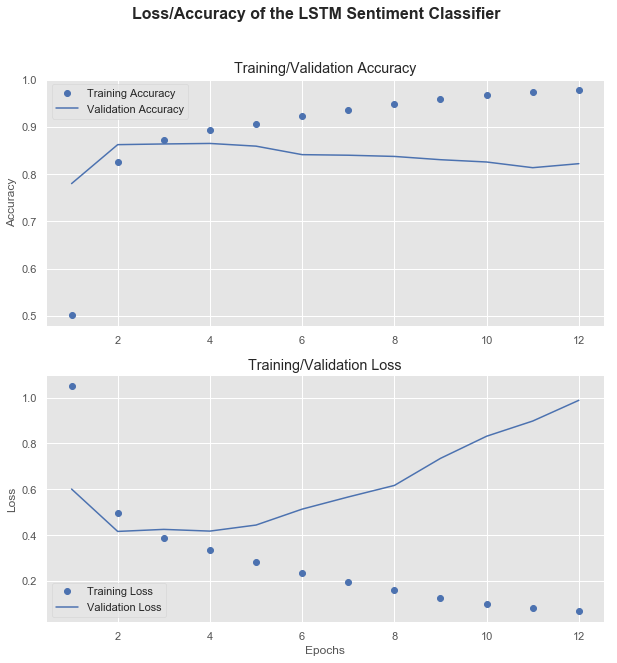

In [69]:
accuracy = history.history['accuracy']
valAccuracy = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot = ax1.plot(epochs, accuracy, 'bo', label='Training Accuracy')
ax1.plot(epochs, valAccuracy, 'b', label='Validation Accuracy')
ax1.set(title='Training/Validation Accuracy', ylabel='Accuracy')
ax1.legend()

plot = ax2.plot(epochs, loss, 'bo', label='Training Loss')
ax2.plot(epochs, valLoss, 'b', label='Validation Loss')
ax2.set(title='Training/Validation Loss', ylabel='Loss', xlabel='Epochs')
ax2.legend()

fig.suptitle('Loss/Accuracy of the LSTM Sentiment Classifier', fontsize=16, fontweight = 'bold')

In [70]:
results = model.evaluate(XTest, yTest)

119/119 [==============================] - 4s 34ms/step - loss: 0.4485 - accuracy: 0.8433


In [71]:
print(classification_report(np.argmax(yTest, 1), model.predict_classes(XTest)))

/home/arun/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


             precision    recall  f1-score   support

          0       0.82      0.78      0.80       619
          1       0.86      0.85      0.85      1546
          2       0.84      0.86      0.85      1633

avg / total       0.84      0.84      0.84      3798



In [72]:
model.save('./LSTM classifier.h5')
keras.models.load_model('./LSTM classifier.h5')